In [45]:
from scipy.io import wavfile
import pygame
import pygame.mixer
import numpy as np
from time import sleep
from scipy import signal

def Play_sound(filename):
    pygame.mixer.init()
    sound = pygame.mixer.Sound(filename)
    tmp = sound.play()
    while tmp.get_busy():
        pygame.time.delay(1)

alpha = 0.8
D = 3000
rate, x = wavfile.read('./오디오샘플/dt.wav')

# 지연 신호를 발생하여 원본에 더해서 구현
def Delay(x, alpha, D):
    y = np.zeros(len(x))
    y[:D-1] = x[:D-1]
    for i in range(D, len(x)):
        y[i] = x[i]+alpha*x[i-D]
    return y

#임펄스 응답을 구하여 콘볼루션 수행
def Delay_Conv(x, alpha, D): 
    h = np.zeros(D)
    y = np.zeros(len(x))
    h[0]=1.0
    h[D-1] = alpha
    y = np.convolve(x,h)
    
    return y

y1 = Delay(x, alpha, D)
y2 = Delay_Conv(x, alpha, D)

y1= np.cast['int16'](y1)
y2= np.cast['int16'](y2)

wavfile.write('dt_Delay.wav', rate, y1)
wavfile.write('dt_Delay_Conv.wav', rate, y2)

Play_sound('dt_Delay.wav')

In [15]:
def Multi_Delay_Conv(x, alpha, D): 
    h = np.zeros(D[2])
    y = np.zeros(len(x))
    h[0]=1.0
    h[D[0]-1] = alpha[0]
    h[D[1]-1] = alpha[1]
    h[D[2]-1] = alpha[2]
    y = np.convolve(x,h)
    
    return y

D = [3000,5000,7000]
alpha = [0.8, 0.5, 0.3]

rate, x = wavfile.read('./오디오샘플/dt.wav')
y = Multi_Delay_Conv(x, alpha, D)
y= np.cast['int16'](y)

wavfile.write('dt_Multi_Delay.wav', rate, y)
Play_sound('dt_Multi_Delay.wav')

y[n] = x[n] + ax[n-D]

1) IIR? FIR? -> FIR  
2) H(z) = 1 + az^(-D)  
3) h[n] = x=0에서 임펄스 1, x=D 에서 a크기.  
4) lfilter 사용ㅎ ㅎ


In [20]:
rate, data = wavfile.read('./오디오샘플/dt.wav')

alpha = 0.8
D = 3000

b = np.zeros(D)
b[0]=1
b[D-1]=alpha
a = np.array([1.0])

y = signal.lfilter(b, a, data)
y= np.cast['int16'](y)

wavfile.write('Echo.wav', rate, y)
Play_sound('Echo.wav')

<실습문제 5-13>

(<StemContainer object of 3 artists>,
 Text(0.5, 1.0, 'Impulse Response of IIR Echo'))

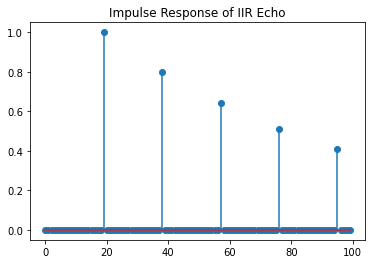

In [26]:
import matplotlib.pyplot as plt

#(a)
alpha = 0.8
D = 20
signal_length = 100

x = np.zeros(signal_length)
x[0] = 1

b = np.zeros(D)
a = np.zeros(D)

b[D-1] = 1.0
a[0] =1.0
a[D-1] = -alpha

y = signal.lfilter(b,a,x)
plt.stem(y), plt.title('Impulse Response of IIR Echo')

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x2306c355ee0>])

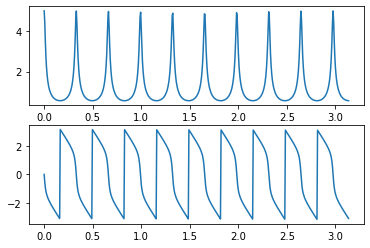

In [27]:
#(B) 주파수응답

w,h = signal.freqz(b,a)
Mag = np.abs(h)
Pha = angles =np.angle(h)

plt.title('Frequency Response of IIR Echo')
plt.subplot(2,1,1), plt.plot(w,Mag) #Comb필터. 빗과 같아보임용.
plt.subplot(2,1,2), plt.plot(w,Pha)

In [18]:
alpha = 0.8
D = 3000
signal_length = 100

x = np.zeros(signal_length)
x[0] = 1

b = np.zeros(D)
a = np.zeros(D)

b[0]=alpha
b[D-1] = 1.0
a[0] = 1.0
a[D-1] = alpha

# (C) lfilter사용하기.
rate, data = wavfile.read('./오디오샘플/dt.wav')

y = signal.lfilter(b, a, data)
y= np.cast['int16'](y)

wavfile.write('IIR_Echo.wav', rate, y)
Play_sound('IIR_Echo.wav')

# 소리가 병에다 대고 말하는것같음. 
# 임펄스가 전부 양의 방향이라서, 계속 더해져서 소리가 잘림. 끼릭끼릭소리.
# 그래서 음의 방향으로 좀 놔주면 상쇄가 될것.

<실습문제 5-14>

(<StemContainer object of 3 artists>,
 Text(0.5, 1.0, 'Impulse Response of IIR Echo'))

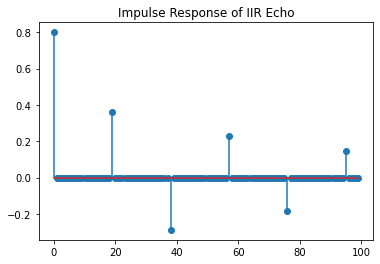

In [28]:
import matplotlib.pyplot as plt

#(a)
alpha = 0.8
D = 20
signal_length = 100

x = np.zeros(signal_length)
x[0] = 1

b = np.zeros(D)
a = np.zeros(D)

b[0]=alpha
b[D-1] = 1.0
a[0] = 1.0
a[D-1] = alpha

y = signal.lfilter(b,a,x)
plt.stem(y), plt.title('Impulse Response of IIR Echo')

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x2306c49c460>])

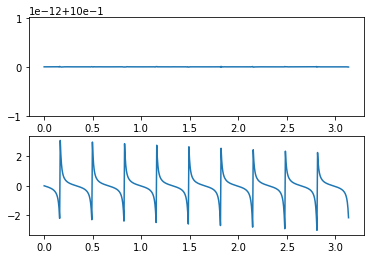

In [29]:
#(B) 주파수응답

w,h = signal.freqz(b,a)
Mag = np.abs(h)
Pha =np.angle(h)

plt.title('Frequency Response of IIR Echo')
plt.subplot(2,1,1), plt.plot(w,Mag) #Comb필터. 빗과 같아보임용.
plt.subplot(2,1,2), plt.plot(w,Pha)

In [31]:
# (C) lfilter사용하기.
rate, data = wavfile.read('./오디오샘플/dt.wav')
import matplotlib.pyplot as plt

alpha = 0.8
D = 300
signal_length = 100

x = np.zeros(signal_length)
x[0] = 1

b = np.zeros(D)
a = np.zeros(D)

b[0]=alpha
b[D-1] = 1.0
a[0] = 1.0
a[D-1] = alpha

y = signal.lfilter(b, a, data)
y= np.cast['int16'](y)

wavfile.write('IIR_Echo2.wav', rate, y)
Play_sound('IIR_Echo2.wav')

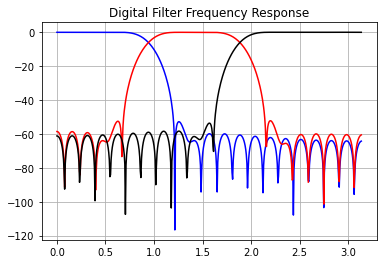

In [43]:
# Equalizer
numtaps = 41
f1 = 0.3
f2 = 0.6

LPF = signal.firwin(numtaps,f1)
BPF = signal.firwin(numtaps,[f1,f2], pass_zero=False)
HPF = signal.firwin(numtaps,f2, pass_zero=False)

#(a) : Frequency Response of Generated Filters

w1, hlpf = signal.freqz(LPF) #분모가 없음. 분자만 넣어주면됨.
w2, hbpf = signal.freqz(BPF) 
w3, hhpf = signal.freqz(HPF) 

plt.title("Digital Filter Frequency Response")
plt.plot(w1, 20*np.log10(np.abs(hlpf)),'b')
plt.plot(w2, 20*np.log10(np.abs(hbpf)),'r')
plt.plot(w3, 20*np.log10(np.abs(hhpf)),'k')
plt.grid()

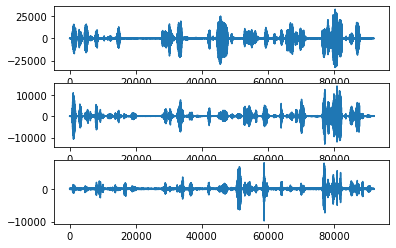

In [48]:
#(b), (C)
rate, data = wavfile.read('./오디오샘플/dt.wav')
a = 1.0
y1 = signal.lfilter(LPF,a,data) #lowpass
y2 = signal.lfilter(BPF,a,data) #bancpass
y3 = signal.lfilter(HPF,a,data) #highpass

y1= np.cast['int16'](y1)
y2= np.cast['int16'](y2)
y3= np.cast['int16'](y3)

plt.subplot(3,1,1), plt.plot(y1)
plt.subplot(3,1,2), plt.plot(y2)
plt.subplot(3,1,3), plt.plot(y3) 

wavfile.write('Lowpass.wav', rate,y1) 
wavfile.write('Bandpass.wav', rate,y2)
wavfile.write('Highpass.wav', rate,y3)
# 소리가 점점 더 작아짐

recover = y1+y2+y3 #원본

#recover = 2* y2 + 3*y3 특정 pass강조.
wavfile.write('Recover.wav', rate,recover)

Play_sound('Lowpass.wav')